In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


<h1>Correctness</h1>

In [5]:
correctness = data.groupby('QuestionId')['IsCorrect'].mean()
correctness = pd.Series(correctness)
correctness = correctness.values.reshape(-1, 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(correctness)
correctness = pd.Series(scaler.transform(correctness).flatten())
print(correctness)

0      0.350699
1      0.500000
2      0.282750
3      0.776884
4      0.301643
         ...   
943    0.494283
944    0.000000
945    0.326059
946    0.369369
947    0.553312
Length: 948, dtype: float64


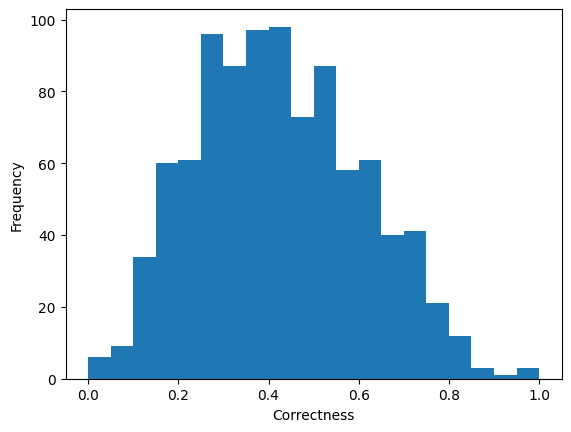

In [6]:
plt.hist(correctness, bins=20)
plt.xlabel("Correctness")
plt.ylabel("Frequency")
plt.show()

<h1>Difficulty</h1>

In [7]:
grade = []
for i in range(max(data['UserId'])+1):
    student = data[data['UserId'] == i]
    correct = student[student['IsCorrect'] == 1]
    
    if len(student) != 0:
        grade.append(len(correct)/len(student))
    else:
        grade.append(0)
grade = pd.Series(grade)
print(grade)

0       0.000000
1       0.419355
2       0.366667
3       1.000000
4       0.681416
          ...   
6143    0.738462
6144    0.326531
6145    0.494118
6146    0.724382
6147    0.717014
Length: 6148, dtype: float64


In [8]:
difficulty = []
for i in range(len(data)):
    difficulty.append(data['IsCorrect'][i] - grade[data['UserId'][i]])
data['difficulty'] = difficulty
print(data)

         QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue   
0               898    2111    280203          1              2            2  \
1               767    3062     55638          1              3            3   
2               165    1156    386475          1              2            2   
3               490    1653    997498          1              4            4   
4               298    3912    578636          1              3            3   
...             ...     ...       ...        ...            ...          ...   
1382722          80    2608     57945          1              2            2   
1382723         707    2549    584230          0              2            1   
1382724         840    5901   1138956          1              1            1   
1382725         794    3854   1151183          0              1            3   
1382726         157    3184   1321883          1              3            3   

         difficulty  
0          0.3743

In [9]:
difficulty = data.groupby('QuestionId')['difficulty'].mean()
# difficulty = pd.Series(difficulty)
difficulty = difficulty.values.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(difficulty)
difficulty = pd.Series(scaler.transform(difficulty).flatten())
print(difficulty)

0      0.318421
1      0.375550
2      0.268172
3      0.745113
4      0.277689
         ...   
943    0.453970
944    0.021633
945    0.310525
946    0.413922
947    0.548844
Length: 948, dtype: float64


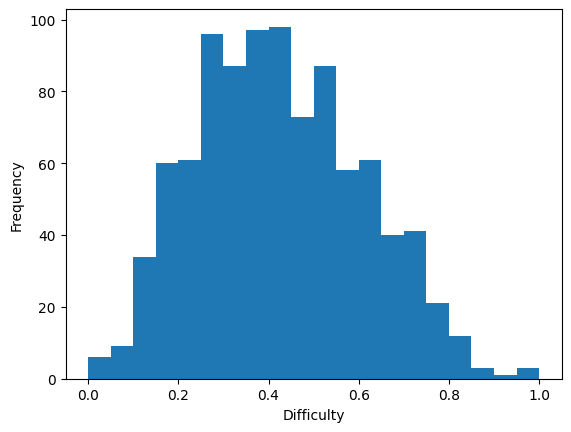

In [10]:
plt.hist(correctness, bins=20)
plt.xlabel("Difficulty")
plt.ylabel("Frequency")
plt.show()

<h1>Answer VAR</h1>

In [11]:
answer= data.groupby('QuestionId')['AnswerValue'].var()
answer = pd.Series(answer)
answer = answer.values.reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(answer)
answer = pd.Series(scaler.transform(answer).flatten())
print(answer)

0      0.298880
1      0.124542
2      0.329316
3      0.124570
4      0.350370
         ...   
943    0.191097
944    0.405944
945    0.328547
946    0.253781
947    0.222288
Length: 948, dtype: float64


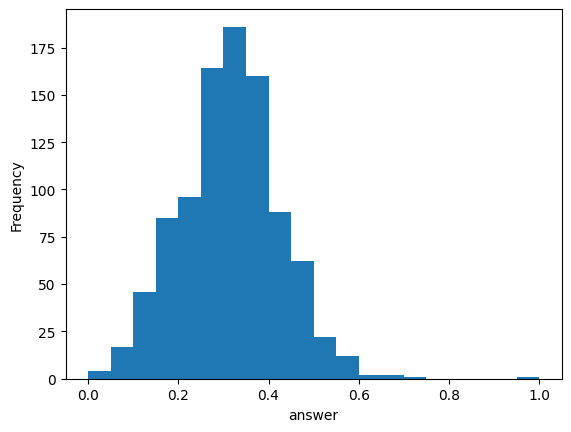

In [12]:
plt.hist(answer, bins=20)
plt.xlabel("answer")
plt.ylabel("Frequency")
plt.show()

<h1>Text Length</h1>

In [13]:
import numpy as np
from pytesseract import Output
import pytesseract
import cv2
from PIL import Image

In [14]:
text_length = []
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR/tesseract.exe'
for i in range(948):
    path = f'data/images/{i}.jpg'
    image = cv2.imread(path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(rgb_image)
    result = ""
    for i in text:
        if i != '\n':
            result += i
    text_length.append(len(result))
print(text_length)

[136, 31, 100, 31, 131, 88, 128, 165, 162, 79, 99, 51, 221, 35, 124, 50, 72, 86, 136, 124, 55, 88, 57, 101, 90, 340, 101, 7, 199, 25, 247, 19, 45, 87, 0, 58, 213, 327, 238, 40, 237, 97, 80, 44, 194, 42, 283, 63, 147, 202, 203, 181, 50, 289, 228, 77, 90, 39, 61, 264, 142, 52, 89, 165, 59, 65, 316, 91, 214, 22, 105, 0, 76, 14, 58, 102, 96, 220, 58, 43, 211, 2, 63, 171, 125, 145, 60, 228, 127, 63, 64, 46, 128, 116, 296, 111, 81, 108, 58, 93, 88, 231, 132, 20, 86, 66, 227, 60, 120, 76, 161, 83, 79, 11, 35, 7, 95, 85, 92, 63, 64, 45, 66, 55, 184, 40, 118, 0, 0, 174, 160, 145, 143, 42, 114, 177, 231, 150, 29, 45, 54, 175, 238, 84, 0, 190, 245, 143, 150, 408, 63, 228, 225, 54, 60, 100, 39, 175, 0, 144, 86, 25, 88, 65, 181, 191, 247, 125, 100, 73, 151, 40, 186, 151, 131, 132, 145, 7, 31, 56, 7, 90, 138, 264, 66, 98, 0, 107, 243, 166, 81, 233, 296, 249, 192, 9, 139, 120, 179, 129, 92, 36, 219, 130, 65, 107, 160, 62, 104, 168, 116, 40, 112, 103, 195, 154, 81, 116, 235, 114, 0, 86, 62, 70, 95, 93

In [15]:
text_length = pd.Series(text_length).values.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(text_length)
text_length = pd.Series(scaler.transform(text_length).flatten())
print(text_length)

0      0.319249
1      0.072770
2      0.234742
3      0.072770
4      0.307512
         ...   
943    0.039906
944    0.291080
945    0.267606
946    0.215962
947    0.267606
Length: 948, dtype: float64


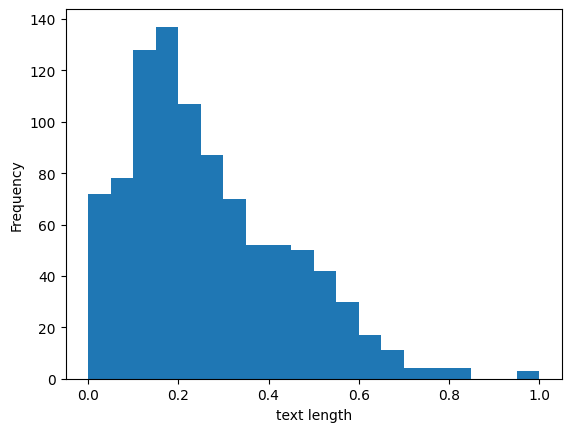

In [16]:
plt.hist(text_length, bins=20)
plt.xlabel("text length")
plt.ylabel("Frequency")
plt.show()

<h1>Validation</h1>

In [17]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    return submission_preference

In [103]:
rank_score1 = correctness
rank1 = rank_score1.rank(ascending=True)
rank_score2 = difficulty
rank2 = rank_score2.rank(ascending=True)
rank_score3 = answer
rank3 = rank_score3.rank(ascending=False)
rank_score4 = text_length
rank4 = rank_score4.rank(ascending=False)
rank_score = rank_score1 + rank_score2 - rank_score4
rank = rank_score.rank(ascending=True)

In [104]:
df = pd.read_csv('template.csv')
# df['ranking'] = rank
df['ranking'] = rank
df.to_csv('result/template.csv', mode='w')

In [105]:
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,0,0,909,318,2,2,2,1.0,2,1.8
1,16,16,285,609,2,2,2,2.0,2,2.0
2,48,48,132,271,1,2,2,2.0,1,1.6
3,38,38,704,127,2,2,1,2.0,2,1.8
4,33,33,16,586,1,1,2,2.0,2,1.6
5,17,17,56,865,2,1,2,2.0,2,1.8
6,27,27,233,478,1,1,1,1.0,2,1.2
7,41,41,877,620,2,2,2,2.0,2,2.0
8,5,5,246,733,1,1,1,2.0,1,1.2
9,35,35,668,741,1,1,1,1.0,1,1.0


In [106]:
validation_result = evaluate(eval_validation, df)

[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1]


In [107]:
from sklearn.metrics import accuracy_score

t1_acc = accuracy_score(eval_validation['T1_ALR'], validation_result)
t2_acc = accuracy_score(eval_validation['T2_CL'], validation_result)
t3_acc = accuracy_score(eval_validation['T3_GF'], validation_result)
t4_acc = accuracy_score(eval_validation['T4_MQ'], validation_result)
t5_acc = accuracy_score(eval_validation['T5_NS'], validation_result)
print(t1_acc)
print(t2_acc)
print(t3_acc)
print(t4_acc)
print(t5_acc)
print((t1_acc+t2_acc+t3_acc+t4_acc+t5_acc)/5)

0.76
0.72
0.8
0.6
0.76
0.7280000000000001


<h1>Test</h1>

In [108]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
eval_test['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_test

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,15,15,145,762,2,2,2,2,2,1.8
1,31,31,307,208,1,1,1,2,1,2.0
2,25,25,278,195,1,1,1,1,1,1.6
3,3,3,13,153,2,2,2,2,2,1.8
4,40,40,23,100,2,1,1,1,1,1.6
5,23,23,532,104,1,1,2,2,1,1.8
6,21,21,155,479,1,1,1,1,2,1.2
7,1,1,304,907,1,1,1,1,1,2.0
8,26,26,242,129,1,1,1,1,1,1.2
9,39,39,688,287,2,1,2,2,2,1.0


In [109]:
test_result = evaluate(eval_test, df)

[2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2]


In [110]:
t1_acc2 = accuracy_score(eval_test['T1_ALR'], test_result)
t2_acc2 = accuracy_score(eval_test['T2_CL'], test_result)
t3_acc2 = accuracy_score(eval_test['T3_GF'], test_result)
t4_acc2 = accuracy_score(eval_test['T4_MQ'], test_result)
t5_acc2 = accuracy_score(eval_test['T5_NS'], test_result)
print(t1_acc2)
print(t2_acc2)
print(t3_acc2)
print(t4_acc2)
print(t5_acc2)
print((t1_acc2+t2_acc2+t3_acc2+t4_acc2+t5_acc2)/5)

0.68
0.64
0.72
0.68
0.68
0.68
